In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("Data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("Data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_data, mouse_data, how='outer', on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [21]:
combined_data.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [22]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_data_mean = combined_data.groupby(["Drug","Timepoint"]).mean()
combined_data_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(combined_data_mean)

# Preview DataFrame
tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [23]:
#Below was provided

In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combined_data_sem = combined_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
tumor_vol_sem_df = pd.DataFrame(combined_data_sem)
# Preview DataFrame
tumor_vol_sem_df.head()


Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [27]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [4]:
#below was provided

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [29]:
# 4 specific drugs picked. Corresponding chart
table_picked_drugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_picked_drugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


No handles with labels found to put in legend.


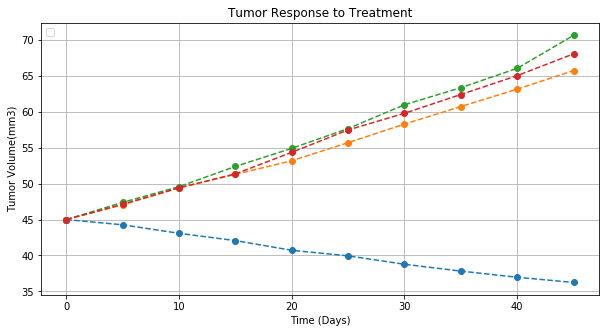

In [44]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

# Save the Figure
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=table_picked_drugs['Timepoint'],y=table_picked_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')
 
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.grid()
plt.legend(loc=2)

# Show the Figure
plt.show()


In [ ]:
#HAVE TO PUT IN LEGEND HERE

## Metastatic Response to Treatment

In [38]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_data_met= combined_data.groupby(["Drug","Timepoint"]).mean()


# Convert to DataFrame
met_mean_df = pd.DataFrame(combined_data_met["Metastatic Sites"])


# Preview DataFrame
met_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combined_data_met_sem = combined_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_sem_df = pd.DataFrame(combined_data_sem)

# Preview DataFrame
met_sem_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [45]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_df.reset_index(level = None, inplace = True)
met_mean_df2 = pd.DataFrame(combined_data_mean)

pivot_table_met = met_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

# Preview that Reformatting worked
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [47]:
met_table_picked_drugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_picked_drugs .head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


No handles with labels found to put in legend.


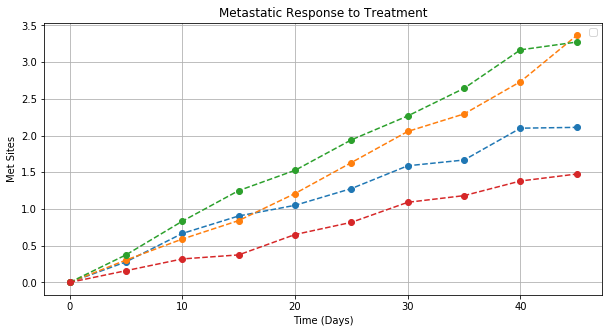

In [50]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Infubinol'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Ketapril'], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Placebo'], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=met_table_picked_drugs['Timepoint'],y=met_table_picked_drugs['Capomulin'], yerr=None, linestyle="--", fmt='o')


plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend()       

# Save the Figure
plt.savefig("../MetSiteResponse.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)